In [268]:
import torch
from pytorch_lightning import Trainer
from models.vanilla_vae import VanillaVAE  # Adjust the import path as necessary
import numpy as np

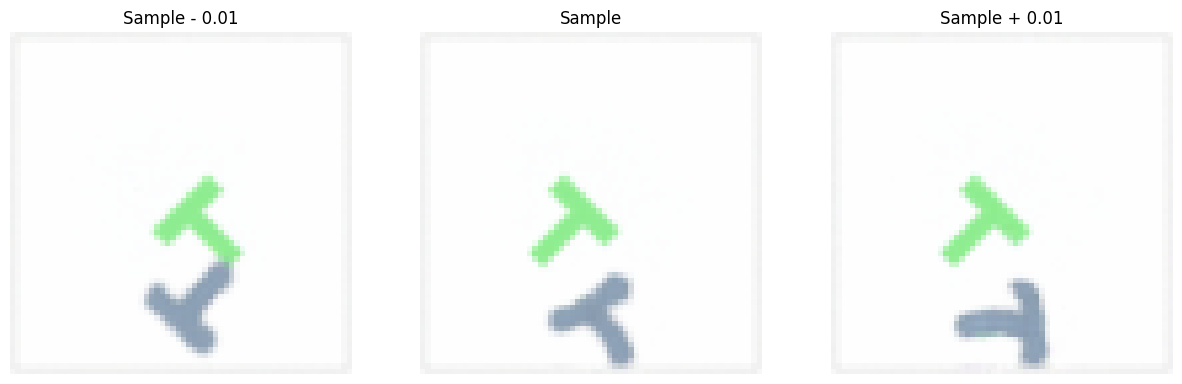

In [269]:


# Define the model parameters (these should match the parameters used during training)
in_channels = 3  # Example: 3 for RGB images
latent_dim = 128  # Example: latent dimension size

# Define the path to the checkpoint
checkpoint_path = 'checkpoint_ssh/version_11/checkpoints/last.ckpt'  # Replace with the actual path to your checkpoint file
checkpoint = torch.load(checkpoint_path)
state_dict = checkpoint['state_dict']
new_state_dict = {}
for k, v in state_dict.items():
    if k.startswith('model.'):
        new_state_dict[k[6:]] = v  # Remove 'model.' prefix
    else:
        new_state_dict[k] = v
model = VanillaVAE(in_channels=in_channels, latent_dim=latent_dim)

# Load the model from the checkpoint
model.load_state_dict(new_state_dict)

# Set the model to evaluation mode
model.eval()

# Move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# img = model.sample(num_samples=1,current_device=device)  # Call the sample method to generate new images

step = 0.5
z = torch.randn(1,model.latent_dim)
z1 = z+step
z2 = z-step
z = z.to(device)
z1 = z1.to(device)
z2 = z2.to(device)
samples = model.decode(z)
samples1 = model.decode(z1)
samples2 = model.decode(z2)




import matplotlib.pyplot as plt

# Convert the tensors to numpy arrays and transpose the dimensions to (H, W, C)
samples_np = samples.cpu().detach().numpy().squeeze().transpose(1, 2, 0)
samples1_np = samples1.cpu().detach().numpy().squeeze().transpose(1, 2, 0)
samples2_np = samples2.cpu().detach().numpy().squeeze().transpose(1, 2, 0)

# Clip the values to be in the range [0, 1]
samples_np = np.clip(samples_np, 0, 1)
samples1_np = np.clip(samples1_np, 0, 1)
samples2_np = np.clip(samples2_np, 0, 1)

# Plot the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].imshow(samples2_np)
axs[0].set_title('Sample - 0.01')
axs[0].axis('off')

axs[1].imshow(samples_np)
axs[1].set_title('Sample')
axs[1].axis('off')

axs[2].imshow(samples1_np)
axs[2].set_title('Sample + 0.01')
axs[2].axis('off')


plt.show()

In [270]:
samples = model.sample(1, current_device=device)
print(samples)

tensor([[[[0.9683, 0.9454, 0.9468,  ..., 0.9489, 0.9436, 0.9654],
          [0.9456, 0.9489, 0.9739,  ..., 0.9725, 0.9497, 0.9460],
          [0.9512, 0.9728, 0.9989,  ..., 0.9990, 0.9727, 0.9474],
          ...,
          [0.9479, 0.9708, 0.9987,  ..., 0.9995, 0.9703, 0.9498],
          [0.9432, 0.9502, 0.9737,  ..., 0.9726, 0.9478, 0.9446],
          [0.9662, 0.9455, 0.9478,  ..., 0.9496, 0.9451, 0.9659]],

         [[0.9650, 0.9449, 0.9469,  ..., 0.9478, 0.9457, 0.9655],
          [0.9437, 0.9484, 0.9728,  ..., 0.9733, 0.9490, 0.9455],
          [0.9486, 0.9712, 0.9996,  ..., 0.9987, 0.9740, 0.9491],
          ...,
          [0.9482, 0.9707, 0.9985,  ..., 0.9994, 0.9727, 0.9490],
          [0.9436, 0.9488, 0.9741,  ..., 0.9735, 0.9486, 0.9477],
          [0.9675, 0.9447, 0.9489,  ..., 0.9493, 0.9449, 0.9682]],

         [[0.9719, 0.9437, 0.9483,  ..., 0.9493, 0.9453, 0.9721],
          [0.9464, 0.9470, 0.9729,  ..., 0.9738, 0.9497, 0.9441],
          [0.9504, 0.9734, 0.9989,  ..., 0